In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cleaned sheets/Metro_Sales_Count.csv')


print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Columns: 195 entries, RegionID to 11/30/2023
dtypes: float64(8), int64(184), object(3)
memory usage: 143.3+ KB
None


In [2]:
print(df.head())


print(df.describe())

   RegionID  SizeRank         RegionName RegionType StateName  2/29/2008  \
0    102001         0      United States    country       USA     205206   
1    394913         1  New York City, NY        msa        NY       8591   
2    753899         2    Los Angeles, CA        msa        CA       4159   
3    394463         3        Chicago, IL        msa        IL       5933   
4    394514         4         Dallas, TX        msa        TX       5058   

   3/31/2008  4/30/2008  5/31/2008  6/30/2008  ...  2/28/2023  3/31/2023  \
0     238071     264215     290180     304596  ...     236545     324071   
1       8967       9977      10232      10854  ...       8915      11164   
2       5058       6075       6903       7242  ...       4634       6728   
3       7454       7716       8388       9313  ...       5744       8927   
4       5733       6228       6909       6913  ...       5294       6831   

   4/30/2023  5/31/2023  6/30/2023  7/31/2023  8/31/2023  9/30/2023  \
0     299951   

In [3]:
print(df.describe())


            RegionID    SizeRank      2/29/2008      3/31/2008      4/30/2008  \
count      94.000000   94.000000      94.000000      94.000000      94.000000   
mean   403121.734043   48.074468    3650.882979    4252.457447    4718.340426   
std     70794.885230   29.732586   21065.584043   24435.119700   27117.296096   
min    102001.000000    0.000000      89.000000      83.000000      93.000000   
25%    394497.500000   23.250000     567.500000     666.000000     746.250000   
50%    394829.500000   47.500000     857.000000    1048.500000    1159.500000   
75%    395029.500000   70.750000    1849.750000    2188.000000    2368.000000   
max    753924.000000  152.000000  205206.000000  238071.000000  264215.000000   

           5/31/2008      6/30/2008      7/31/2008      8/31/2008  \
count      94.000000      94.000000      94.000000      94.000000   
mean     5161.808511    5441.031915    5514.829787    5173.659574   
std     29780.968597   31259.830041   31629.341717   29766.6534

In [4]:
df.dropna(inplace=True)

In [5]:
print(df.columns)


Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '2/29/2008', '3/31/2008', '4/30/2008', '5/31/2008', '6/30/2008',
       ...
       '2/28/2023', '3/31/2023', '4/30/2023', '5/31/2023', '6/30/2023',
       '7/31/2023', '8/31/2023', '9/30/2023', '10/31/2023', '11/30/2023'],
      dtype='object', length=195)


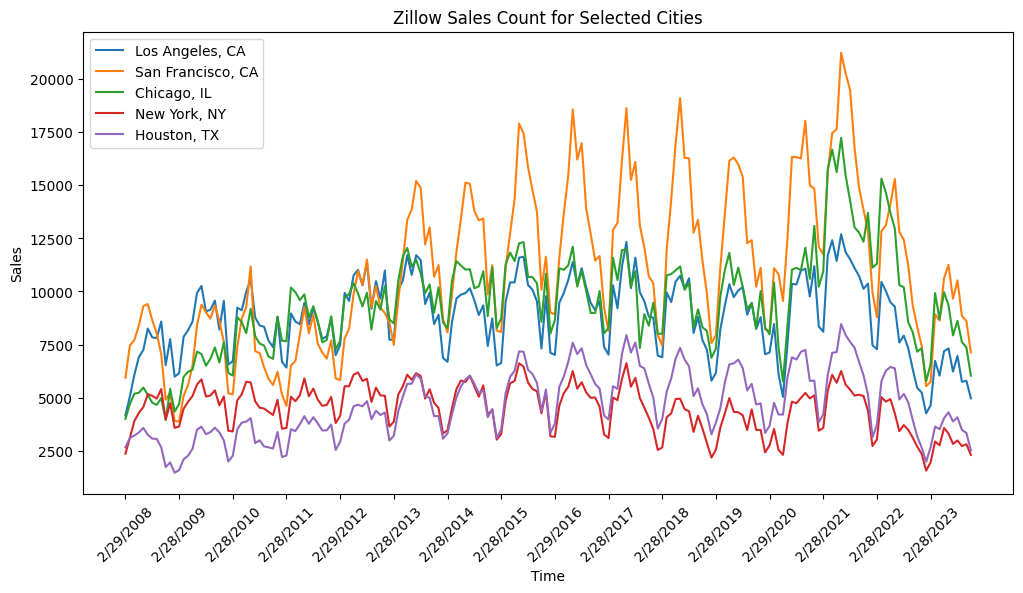

In [6]:
import matplotlib.pyplot as plt

region_names = ['Los Angeles, CA', 'San Francisco, CA', 'Chicago, IL', 'New York, NY', 'Houston, TX', 'Seattle, WA', 'Miami, FL']


multiple_city_df = df[df['RegionName'].isin(region_names)]

 
plt.figure(figsize=(12, 6))
lines = plt.plot(multiple_city_df.iloc[:, 5:].T)


plt.xticks(range(0, len(multiple_city_df.columns[5:]), 12), multiple_city_df.columns[5:][::12], rotation=45)

plt.title('Zillow Sales Count for Selected Cities')
plt.xlabel('Time')
plt.ylabel('Sales')


plt.legend(region_names)

plt.show()



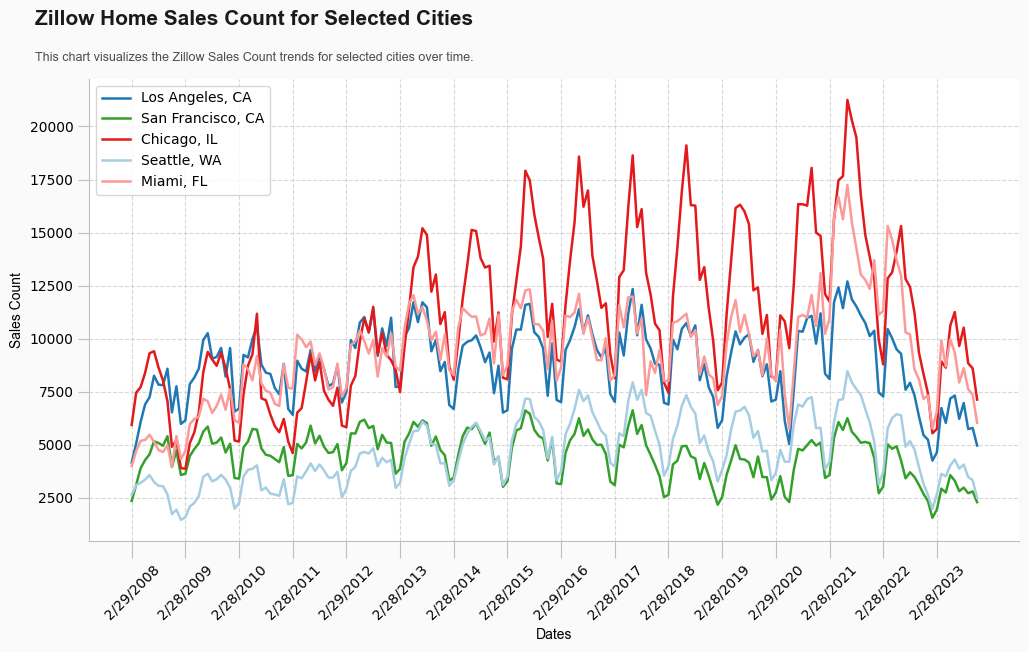

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


region_names = ['Los Angeles, CA', 'San Francisco, CA', 'Chicago, IL', 'New York City, NY', 'Houston, TX', 'Seattle, WA', 'Miami, FL']

multiple_city_df = df[df['RegionName'].isin(region_names)]


COLOR_PALETTE = [
    "#1f78b4",  # Los Angeles, CA
    "#33a02c",  # San Francisco, CA
    "#e31a1c",  # Chicago, IL
    "#6a3d9a",  # New York, NY
    "#ff7f00",  # Dallas, TX
    "#a6cee3",  # Seattle, WA
    "#fb9a99"   # Miami, FL
]


fig, ax = plt.subplots(figsize=(12, 6))


fig.patch.set_facecolor("#fafafa")  


VLINES = np.arange(0, len(multiple_city_df.columns[5:]), 12)


for idx, city in enumerate(region_names):
    data = multiple_city_df[multiple_city_df['RegionName'] == city]
    color = COLOR_PALETTE[idx]
    ax.plot(data.iloc[:, 5:].T, label=city, color=color, lw=1.8)


ax.set_xticks(VLINES)
ax.set_xticklabels(multiple_city_df.columns[5:][::12], rotation=45)


ax.set_xlabel('Dates', fontname='Arial')
ax.set_ylabel('Sales Count', fontname='Arial')


ax.tick_params(axis="x", length=12, color="#bfbfbf")  
ax.tick_params(axis="y", length=8, color="#bfbfbf")  


ax.spines["left"].set_color("#bfbfbf")  
ax.spines["bottom"].set_color("#bfbfbf")  
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")

ax.grid(True, linestyle='--', alpha=0.6, color='#bfbfbf')


ax.legend()


fig.text(
    0.08,
    0.97,
    "Zillow Home Sales Count for Selected Cities",
    color="#1a1a1a",  
    fontsize=15,
    fontname="Arial",
    weight="bold"
)

fig.text(
    0.08,
    0.91,
    "This chart visualizes the Zillow Sales Count trends for selected cities over time.",
    ha="left",
    color="#4d4d4d",  
    fontname="Arial",
    fontsize=9,
)

plt.show()




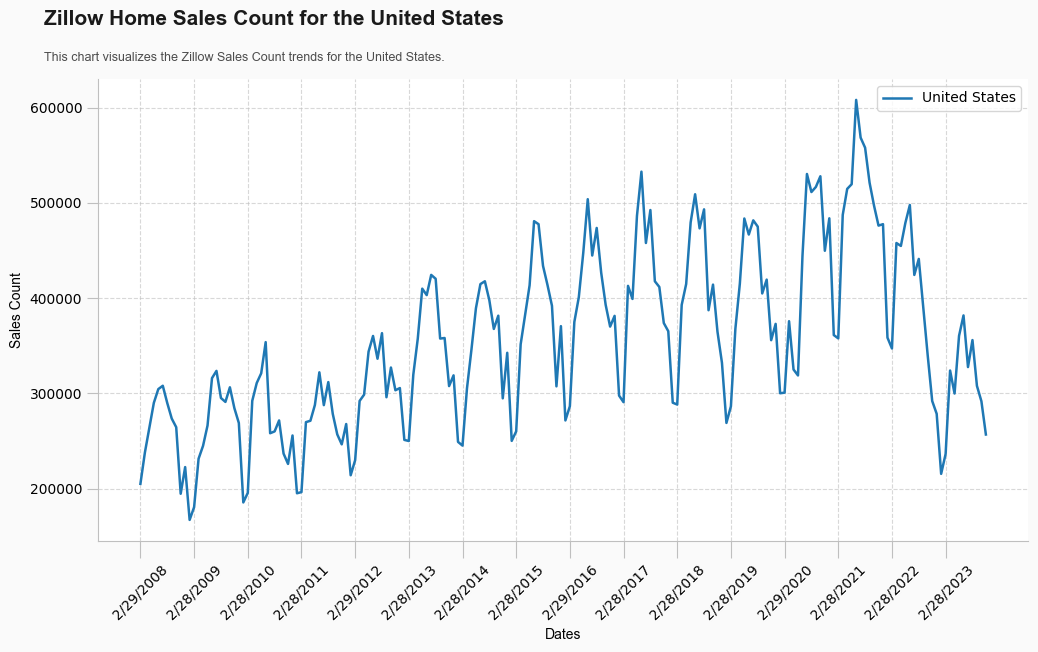

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


region_names = ['United States']

multiple_city_df = df[df['RegionName'].isin(region_names)]


COLOR_PALETTE = [
    "#1f78b4",  

]


fig, ax = plt.subplots(figsize=(12, 6))

fig.patch.set_facecolor("#fafafa")  

 
VLINES = np.arange(0, len(multiple_city_df.columns[5:]), 12)


for idx, city in enumerate(region_names):
    data = multiple_city_df[multiple_city_df['RegionName'] == city]
    color = COLOR_PALETTE[idx]
    ax.plot(data.iloc[:, 5:].T, label=city, color=color, lw=1.8)


ax.set_xticks(VLINES)
ax.set_xticklabels(multiple_city_df.columns[5:][::12], rotation=45)


ax.set_xlabel('Dates', fontname='Arial')
ax.set_ylabel('Sales Count', fontname='Arial')

ax.tick_params(axis="x", length=12, color="#bfbfbf")  
ax.tick_params(axis="y", length=8, color="#bfbfbf")  


ax.spines["left"].set_color("#bfbfbf")  
ax.spines["bottom"].set_color("#bfbfbf")  
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")

ax.grid(True, linestyle='--', alpha=0.6, color='#bfbfbf')


ax.legend()


fig.text(
    0.08,
    0.97,
    "Zillow Home Sales Count for the United States",
    color="#1a1a1a",  
    fontsize=15,
    fontname="Arial",
    weight="bold"
)

fig.text(
    0.08,
    0.91,
    "This chart visualizes the Zillow Sales Count trends for the United States.",
    ha="left",
    color="#4d4d4d",  
    fontname="Arial",
    fontsize=9,
)

plt.show()


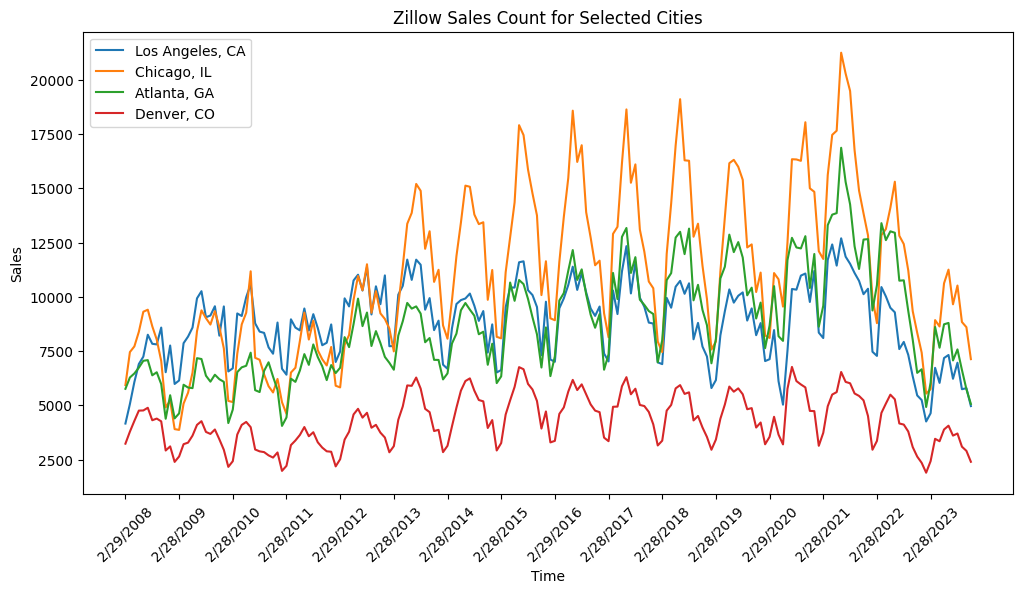

In [9]:
import matplotlib.pyplot as plt

region_names = ['Los Angeles, CA', 'New York, NY', 'Chicago, IL', 'Denver, CO', 'Atlanta, GA'] 

 
 
multiple_city_df = df[df['RegionName'].isin(region_names)]

 
plt.figure(figsize=(12, 6))
plt.plot(multiple_city_df.iloc[:, 5:].T)


plt.xticks(range(0, len(multiple_city_df.columns[5:]), 12), multiple_city_df.columns[5:][::12], rotation=45)

plt.title('Zillow Sales Count for Selected Cities')
plt.xlabel('Time')
plt.ylabel('Sales')


plt.legend(multiple_city_df['RegionName'])

plt.show()

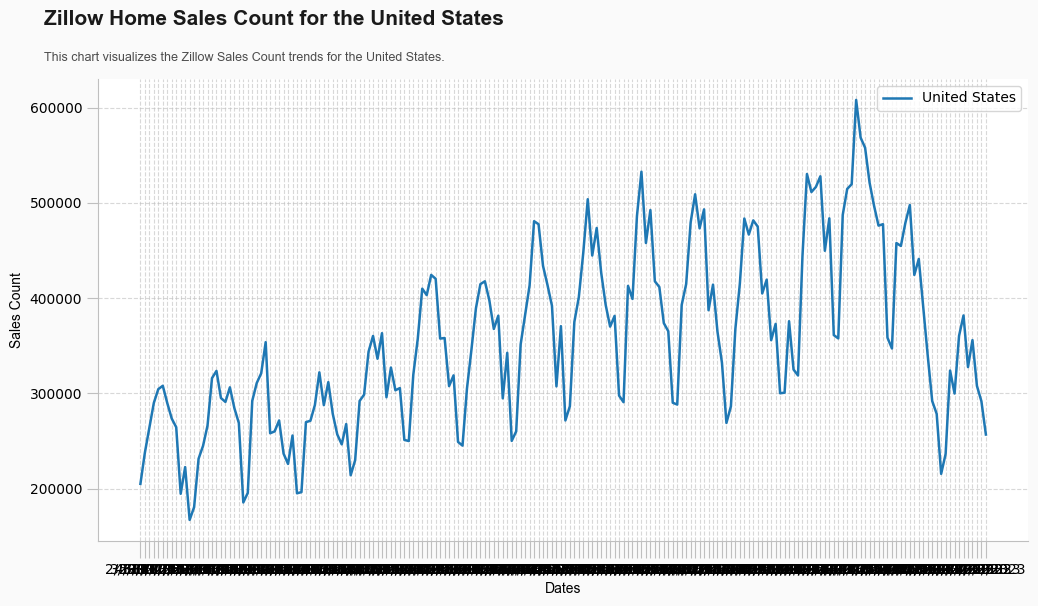

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


region_names = ['United States']

multiple_city_df = df[df['RegionName'].isin(region_names)]


COLOR_PALETTE = [
    "#1f78b4",  

]


fig, ax = plt.subplots(figsize=(12, 6))


fig.patch.set_facecolor("#fafafa")  


VLINES = np.arange(0, len(multiple_city_df.columns[5:]), 12)


for idx, city in enumerate(region_names):
    data = multiple_city_df[multiple_city_df['RegionName'] == city]
    color = COLOR_PALETTE[idx]
    ax.plot(data.iloc[:, 5:].T, label=city, color=color, lw=1.8)



ax.set_xlabel('Dates', fontname='Arial')
ax.set_ylabel('Sales Count', fontname='Arial')


ax.tick_params(axis="x", length=12, color="#bfbfbf")  
ax.tick_params(axis="y", length=8, color="#bfbfbf")  


ax.spines["left"].set_color("#bfbfbf")  
ax.spines["bottom"].set_color("#bfbfbf")  
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")

ax.grid(True, linestyle='--', alpha=0.6, color='#bfbfbf')

ax.legend()


fig.text(
    0.08,
    0.97,
    "Zillow Home Sales Count for the United States",
    color="#1a1a1a",  
    fontsize=15,
    fontname="Arial",
    weight="bold"
)

fig.text(
    0.08,
    0.91,
    "This chart visualizes the Zillow Sales Count trends for the United States.",
    ha="left",
    color="#4d4d4d",  
    fontname="Arial",
    fontsize=9,
)

plt.show()
